In [2]:
# Programming for DataScience - Student ID - 2233328
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

In [3]:
# chosen the column names from the car names file
columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'] 

In [4]:
data = pd.read_csv("car.csv",names=columns)
data

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [5]:
#calculating the Nan values
data.isna().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

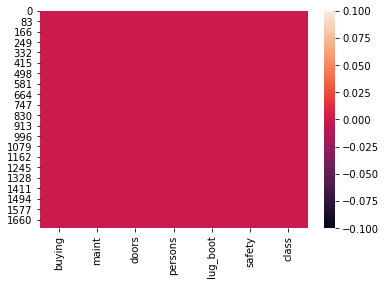

In [6]:
# Visualize how much data missing in columns . As there is no missing value, plot doesn't show anything
import seaborn as sns

sns.heatmap(data.isnull())

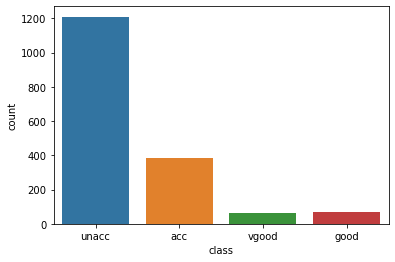

In [7]:
sns.countplot(x='class',data=data)

In [8]:
# number of counts of each possible value in "class"
data['class'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

In [9]:
#Assigning numerical values and assigning to the variable as sklearn doesn't recognize string
def label(data, feature):
    feature_label_name = {ni: n for n, ni in enumerate(set(data[feature]))}
    return feature_label_name
buying_label = label(data, 'buying')
maint_label = label(data, 'maint')
doors_label = label(data, 'doors')
person_label = label(data, 'persons')
lug_boot_label = label(data, 'lug_boot')
safety_label = label(data, 'safety')
class_label = label(data, 'class')

In [10]:
df = data
df['buying'] = df['buying'].map(buying_label)
df['maint'] = df['maint'].map(maint_label)
df['doors'] = df['doors'].map(doors_label)
df['persons'] = df['persons'].map(person_label)
df['lug_boot'] = df['lug_boot'].map(lug_boot_label)
df['safety'] = df['safety'].map(safety_label)
df['class'] = df['class'].map(class_label)
df

,buying,maint,doors,persons,lug_boot,safety,class
0,2,2,3,2,2,2,2
1,2,2,3,2,2,0,2
2,2,2,3,2,2,1,2
3,2,2,3,2,0,2,2
4,2,2,3,2,0,0,2
...,...,...,...,...,...,...,...
1723,1,1,1,1,0,0,1
1724,1,1,1,1,0,1,0
1725,1,1,1,1,1,2,2
1726,1,1,1,1,1,0,1


In [11]:
print("buying_label",buying_label)
print("maint_label",maint_label)
print("doors_label",doors_label)
print("persons_label",person_label)
print("lug_boot_label",lug_boot_label)
print("safety_label",safety_label)
print("class_label",class_label)

buying_label {'high': 0, 'low': 1, 'vhigh': 2, 'med': 3}
maint_label {'high': 0, 'low': 1, 'vhigh': 2, 'med': 3}
doors_label {'4': 0, '5more': 1, '3': 2, '2': 3}
persons_label {'4': 0, 'more': 1, '2': 2}
lug_boot_label {'med': 0, 'big': 1, 'small': 2}
safety_label {'med': 0, 'high': 1, 'low': 2}
class_label {'vgood': 0, 'good': 1, 'unacc': 2, 'acc': 3}


In [12]:
# Values in the column 'class'
df['class'].value_counts()

2    1210
3     384
1      69
0      65
Name: class, dtype: int64

In [13]:
# X and y values from the dataset
X = df.iloc[:,:5].values
y = df.iloc[:,6:].values

In [14]:
# Chooseing train and test values for the 10 fold dataset.stratified k-fold cross-validation, the folds are selected so that the mean response value is approximately equal in all the folds
# Random state- 42, to get the same output
#Test train split data with 10 folds
kf_data = StratifiedKFold(n_splits=10, shuffle=True,random_state=42)
cnt = 1
for train_index, test_index in kf_data.split(X, y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt+=1
  #  print(kf_data)
Xtrain, Xtest = X[train_index], X[test_index]
ytrain, ytest = y[train_index], y[test_index]
    

Fold:1, Train set: 1555, Test set:173
Fold:2, Train set: 1555, Test set:173
Fold:3, Train set: 1555, Test set:173
Fold:4, Train set: 1555, Test set:173
Fold:5, Train set: 1555, Test set:173
Fold:6, Train set: 1555, Test set:173
Fold:7, Train set: 1555, Test set:173
Fold:8, Train set: 1555, Test set:173
Fold:9, Train set: 1556, Test set:172
Fold:10, Train set: 1556, Test set:172


In [15]:
# Defining function to calculate the accuracy using training and testing data
def classifier(model, Xtrain, Xtest, ytrain, y_test):
    clf = model
    clf.fit(Xtrain, ytrain)
    y_pred = clf.predict(Xtest)
    y_score = clf.fit(Xtrain, ytrain)
    score = accuracy_score(ytest, y_pred)
    return score, model

In [16]:
# Calculating Accuracy with no fold
score , tree_model = classifier(DecisionTreeClassifier(random_state=42),Xtrain, Xtest, ytrain, ytest)
print("Accuracy with no fold:",tree_model,score)
score,model = classifier(AdaBoostClassifier(n_estimators = 100),Xtrain, Xtest, ytrain, ytest)
print("Accuracy with no fold:",model,score)


Accuracy with no fold: DecisionTreeClassifier(random_state=42) 0.5755813953488372


C:\Users\urshe\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\urshe\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Accuracy with no fold: AdaBoostClassifier(n_estimators=100) 0.5872093023255814


In [17]:
#Decision Tree Classifier with 10 folds
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
clf_tree = DecisionTreeClassifier(random_state=42)
clf_tree.fit(Xtrain, ytrain)
cv_score = cross_val_score(clf_tree, X, y, cv=kf_data,scoring="accuracy")
cv_score_m = cv_score.mean()
for i in range(10):
    print(f'Decision Tree: Accuracy for each fold : {cv_score[i]}')

print(f'\nDecision Tree:AVERAGE ACCURACY: {"{:.4f}".format(cv_score.mean())}')


Decision Tree: Accuracy for each fold : 0.5838150289017341
Decision Tree: Accuracy for each fold : 0.5664739884393064
Decision Tree: Accuracy for each fold : 0.5953757225433526
Decision Tree: Accuracy for each fold : 0.5491329479768786
Decision Tree: Accuracy for each fold : 0.5953757225433526
Decision Tree: Accuracy for each fold : 0.5606936416184971
Decision Tree: Accuracy for each fold : 0.5780346820809249
Decision Tree: Accuracy for each fold : 0.5780346820809249
Decision Tree: Accuracy for each fold : 0.563953488372093
Decision Tree: Accuracy for each fold : 0.5755813953488372

Decision Tree:AVERAGE ACCURACY: 0.5746


In [18]:
# AdaBoost classifier with 10 folds
# define the model
model = AdaBoostClassifier(n_estimators = 100, learning_rate = 1,random_state=42)
y = np.ravel(y)
# evaluate the model
cv_score_boost = cross_val_score(model, X, y, cv=kf_data,scoring="accuracy")
# report performance
for i in range(10):
    print(f'Adaboost :Accuracy for each fold : {cv_score_boost[i]}')
    
print(f'\nAdaboost : AVERAGE ACCURACY: {"{:.4f}".format(cv_score_boost.mean())}')


Adaboost :Accuracy for each fold : 0.6127167630057804
Adaboost :Accuracy for each fold : 0.5549132947976878
Adaboost :Accuracy for each fold : 0.5722543352601156
Adaboost :Accuracy for each fold : 0.5491329479768786
Adaboost :Accuracy for each fold : 0.5433526011560693
Adaboost :Accuracy for each fold : 0.5780346820809249
Adaboost :Accuracy for each fold : 0.5433526011560693
Adaboost :Accuracy for each fold : 0.5664739884393064
Adaboost :Accuracy for each fold : 0.5058139534883721
Adaboost :Accuracy for each fold : 0.5872093023255814

Adaboost : AVERAGE ACCURACY: 0.5613


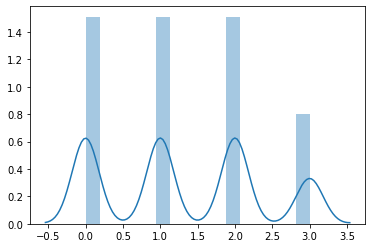

In [19]:
# To visualize whether the data is distributed normally. The graphs shows the Gaussian distribution.
sns.distplot(X)

In [27]:
# Paired Stident t-test.As the graph shows the Gaussian distribution , I have chosen the Parametric statistical test
# to compare the performance of the model.Parametric analysis is to test group means.
#A paired t-test compares the differences of accuracies and we use the same data for both the models

from scipy import stats
acc_list_DT = cv_score # Decision Tree accuracies for 10 fold
acc_list_AB= cv_score_boost # Ada boost accuracies for 10 fold

# compare samples
stat, p = stats.ttest_rel(acc_list_DT, acc_list_AB)
print(stat,p)
#print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0.No Significant difference)')
else:
	print('Different distribution. Significant difference')

1.4508388597301933 0.18076844134256218
Same distribution (fail to reject H0.No Significant difference)


In [21]:
#The result is :1.4508388597301933  and stat =0.18076844134256218
#Same distribution (fail to reject H0.No Significant difference)
# The model has no significance as the p_value is >0.05.So both the models may probably have same performance.